In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
df = pd.read_csv('../../mydata/auto-mpg.csv')
origin_map = {1:'USA', 2:'Europe', 3:'Japan'}

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


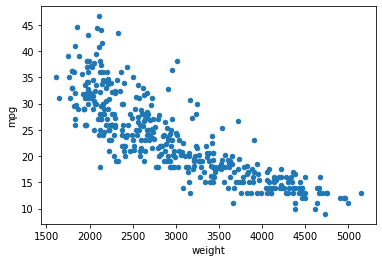

In [4]:
df.plot(kind='scatter', x='weight', y='mpg')

In [5]:
z = np.polyfit(df['weight'], df['mpg'], 2)
f = np.poly1d(z)

In [6]:
z

array([ 1.71652679e-06, -1.86423243e-02,  6.25166522e+01])

In [7]:
f.variable

'x'

In [8]:
x_new = np.linspace(800, 5500, 1000)
y_new = f(x_new)

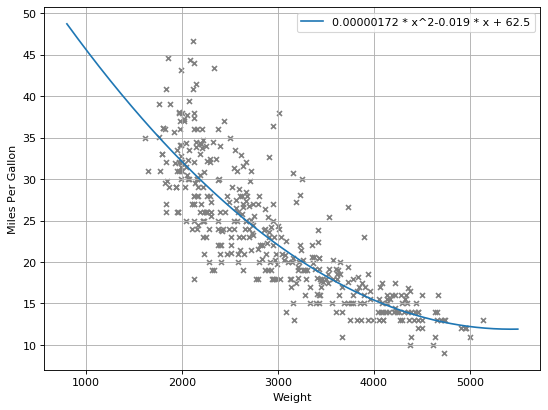

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=df['weight'], y=df['mpg'], color='grey', marker='x', s=20)
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

plt.plot(x_new, y_new, label='0.00000172 * x^2-0.019 * x + 62.5')
plt.grid()
plt.legend()
plt.show()

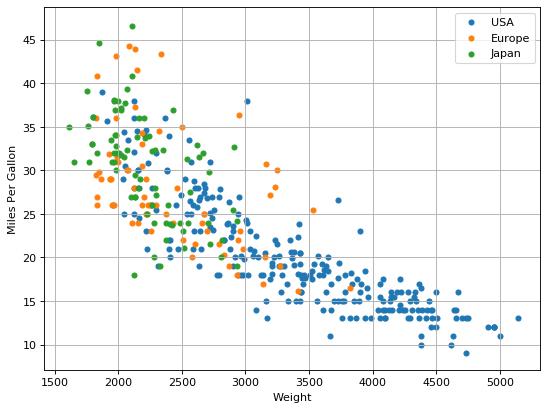

In [10]:
df_origin = df.groupby('origin')

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for name, group in df_origin:
    axes = plt.scatter(x=group['weight'], y=group['mpg'], marker='o', label=origin_map[name], s=20)
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.grid()
plt.legend()
plt.show()

 
-0.01072 x + 54.26


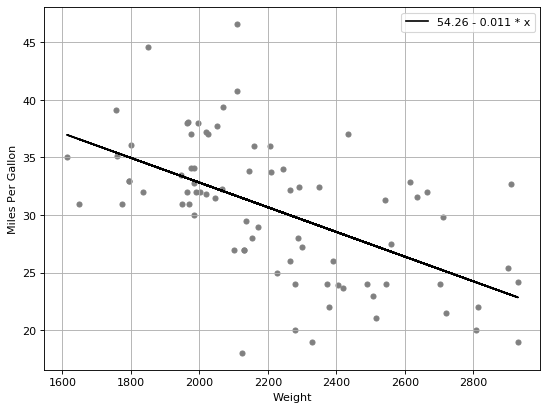

In [11]:
df_japan = df[df.origin == 3]

z = np.polyfit(df_japan['weight'], df_japan['mpg'], 1)
f = np.poly1d(z)
print(f)
x_new = np.linspace(1400, 3200, 200)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=df_japan['weight'], y=df_japan['mpg'], marker='o', s=20, color='grey')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.plot(df_japan['weight'], f(df_japan['weight']), label='54.26 - 0.011 * x', color='black')
plt.grid()
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(df_japan['mpg'], f(df_japan['weight']))
r2

0.31821608233954013

 
-0.006814 x + 42.99 - fit line
0.7154511602813305 - R2


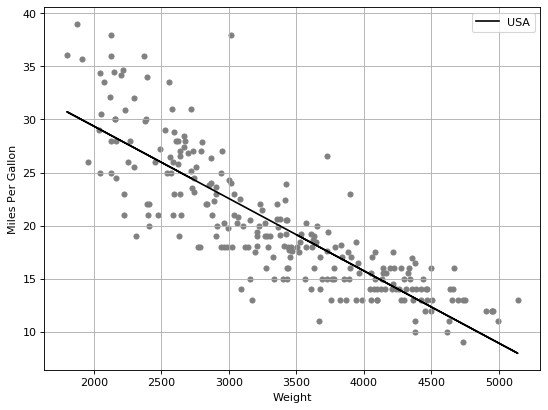

 
-0.007215 x + 45.38 - fit line
0.2765081152785299 - R2


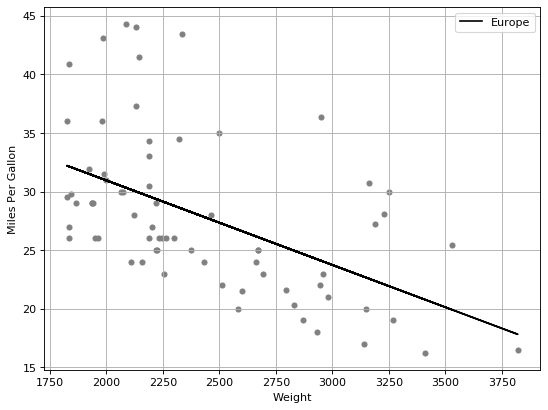

 
-0.01072 x + 54.26 - fit line
0.31821608233954013 - R2


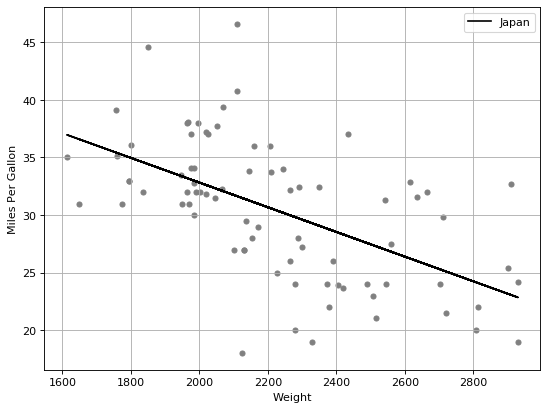

In [13]:
def plot_origin_fit(name, dataset, index=0, parent_figure=0):

    z = np.polyfit(dataset['weight'], dataset['mpg'], 1)
    f = np.poly1d(z)
    print(f"{f} - fit line\n{r2_score(dataset['mpg'], f(dataset['weight']))} - R2")

    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x=dataset['weight'], y=dataset['mpg'], marker='o', s=20, color='grey')
    plt.xlabel('Weight')
    plt.ylabel('Miles Per Gallon')
    plt.plot(dataset['weight'], f(dataset['weight']), label=origin_map[name], color='black')
    plt.grid()
    plt.legend()
    plt.show()

for name, dataset in df.groupby(df.origin):
    plot_origin_fit(name, dataset)